<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/13_lstm_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM MNIST

In [ ]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [ ]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11493376/11490434 [==============================] - 6s 1us/step


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3269 - accuracy: 0.8954 - val_loss: 0.1336 - val_accuracy: 0.9612
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1078 - accuracy: 0.9678 - val_loss: 0.0807 - val_accuracy: 0.9759
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0722 - accuracy: 0.9785 - val_loss: 0.0948 - val_accuracy: 0.9702
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - accuracy: 0.9829 - val_loss: 0.0846 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 0.0537 - val_accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0584 - val_accuracy: 0.9820
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9899 - val_loss: 0.0493 - val_accuracy:

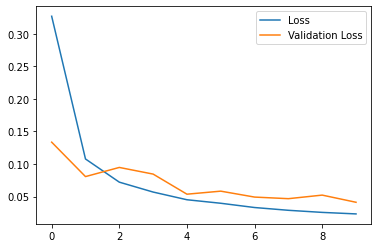

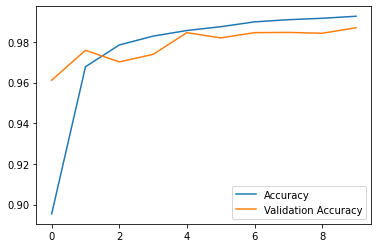

313/313 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9870
Accuracy: 0.9869999885559082


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

Confusion matrix, without normalization
[[ 975    0    0    0    0    0    3    2    0    0]
 [   0 1131    1    1    0    1    1    0    0    0]
 [   2    1 1017    3    1    0    0    6    2    0]
 [   0    0    3 1002    0    2    0    0    2    1]
 [   0    0    0    0  967    0    4    1    1    9]
 [   1    0    0    4    0  879    3    0    1    4]
 [   2    2    0    0    0    4  947    0    2    1]
 [   0    4    3    8    1    0    1 1008    3    0]
 [   1    0    0    4    2    4    0    2  957    4]
 [   1    1    0    0    9    1    0    7    3  987]]


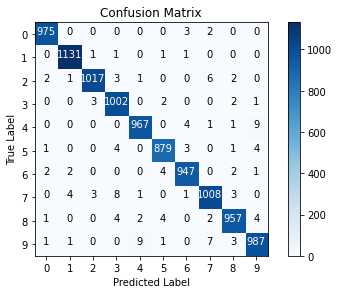

In [ ]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Display a random misclassified image

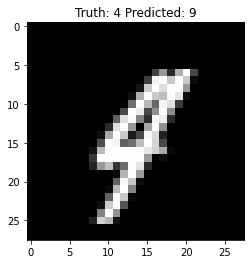

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'Truth: {y_test[i]} Predicted: {p_test[i]}')
plt.show()